In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

# Ensure inline plotting for Jupyter notebooks
%matplotlib inline


In [57]:
# Define a transformation to convert images to tensor format
to_tensor_transform = transforms.ToTensor()


In [58]:
# Define the path to the dataset directory
data_path = 'C:\\Users\\venka\\DeepLearning'

# Load the MNIST datasets with the specified transformations
train_data_set = datasets.MNIST(root=data_path, train=True, download=True, transform=to_tensor_transform)
test_data_set = datasets.MNIST(root=data_path, train=False, download=True, transform=to_tensor_transform)


In [59]:
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: C:\Users\venka\DeepLearning
    Split: Train
    StandardTransform
Transform: ToTensor()

In [60]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: C:\Users\venka\DeepLearning
    Split: Test
    StandardTransform
Transform: ToTensor()

In [61]:
batch_sizes = [5, 25, 125, 500, 1000]
train_loader1 = DataLoader(train_data_set, batch_size=batch_sizes[0], shuffle=True)
test_loader1 = DataLoader(test_data_set, batch_size=batch_sizes[0], shuffle=True)

train_loader2 = DataLoader(train_data_set, batch_size=batch_sizes[1], shuffle=True)
test_loader2 = DataLoader(test_data_set, batch_size=batch_sizes[1], shuffle=True)

train_loader3 = DataLoader(train_data_set, batch_size=batch_sizes[2], shuffle=True)
test_loader3 = DataLoader(test_data_set, batch_size=batch_sizes[2], shuffle=True)

train_loader4 = DataLoader(train_data_set, batch_size=batch_sizes[3], shuffle=True)
test_loader4 = DataLoader(test_data_set, batch_size=batch_sizes[3], shuffle=True)

train_loader5 = DataLoader(train_data_set, batch_size=batch_sizes[4], shuffle=True)
test_loader5 = DataLoader(test_data_set, batch_size=batch_sizes[4], shuffle=True)

In [62]:
# Calculate the number of parameters in the model
def calc_params(model):
    total_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    return total_params


In [63]:
# Model1 with 16,330 parameters
class Model1(nn.Module):
    def __init__(self, in_features=784, hidden1_units=20, hidden2_units=20, out_features=10):
        super().__init__()
        self.fc_1 = nn.Linear(in_features, hidden1_units)    
        self.fc_2 = nn.Linear(hidden1_units, hidden2_units)
        self.out = nn.Linear(hidden2_units, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.out(x)
        return x


In [64]:
model1=Model1()

In [65]:
model1

Model1(
  (fc_1): Linear(in_features=784, out_features=20, bias=True)
  (fc_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [66]:
model1params=calc_params(model1)
print(model1params)

16330


In [67]:
# Define the loss function
loss_function = nn.CrossEntropyLoss()


In [68]:
# Initialize the SGD optimizer with a learning rate of 0.001
optimizer1 = torch.optim.SGD(model1.parameters(), lr=0.001)


In [69]:
epochs = 10
train_correct_mod1 = []
test_correct_mod1 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader1):
       
        y_pred = model1(X_train.view(5, -1))  
        loss = loss_function(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer1.zero_grad()
        loss.backward()
        optimizer1.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod1=loss
    train_correct_mod1.append(train_corr)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader1):

            # Apply the model
            y_val = model1(X_test.view(5, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = loss_function(y_val, y_test)
    test_losses_mod1=(loss)
    test_correct_mod1.append(test_corr)

In [70]:
# Convert the training losses tensor to a NumPy array
train_losses_model1 = train_losses_mod1.detach().numpy()


In [71]:
for t in train_correct_mod1:
    trn_accu_mod1=t/600
    
print(trn_accu_mod1)

tensor(92.5467)


In [72]:
for t in test_correct_mod1:
    tst_accu_mod1=t/100
    
print(tst_accu_mod1)

tensor(92.6400)


In [73]:
# Calculate sensitivity of every model
sensitivity_list = []

# Model1
# Get gradient norm (From slides)
total_grad_norm = 0.0
total_frob_norm = 0
parameter_count = 0

for param in model1.parameters():
    if param.grad is not None:
        grad = param.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        total_frob_norm += frob_norm
        parameter_count += 1

average_frob_norm = total_frob_norm / parameter_count if parameter_count > 0 else 0
sensitivity_list.append(average_frob_norm)


#---------------------------Model2-------------------#

In [74]:
# Model2 with 16,330 parameters
class Model2(nn.Module):
    def __init__(self, in_features=784, hidden1_units=20, hidden2_units=20, out_features=10):
        super().__init__()
        self.fc_1 = nn.Linear(in_features, hidden1_units)    
        self.fc_2 = nn.Linear(hidden1_units, hidden2_units)
        self.out = nn.Linear(hidden2_units, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.out(x)
        return x


In [75]:
model2 = Model2()
model2

Model2(
  (fc_1): Linear(in_features=784, out_features=20, bias=True)
  (fc_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [76]:
model2params=calc_params(model2)
print(model2params)

16330


In [77]:
# Define the loss function
loss_function_model2 = nn.CrossEntropyLoss()

# Define the optimizer
optimizer_model2 = torch.optim.Adam(model2.parameters(), lr=0.001)


In [78]:
epochs = 10
train_correct_mod2 = []
test_correct_mod2 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader2):
        
        y_pred = model2(X_train.view(25, -1))  
        loss = loss_function(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer_model2.zero_grad()
        loss.backward()
        optimizer_model2.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod2=loss
    train_correct_mod2.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader2):

            # Apply the model
            y_val = model2(X_test.view(25, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = loss_function_model2(y_val, y_test)
    test_losses_mod2=(loss)
    test_correct_mod2.append(test_corr)

In [79]:
# Convert the training losses tensor to a NumPy array
train_losses_model2 = train_losses_mod2.detach().numpy()


In [80]:
for t in train_correct_mod2:
    trn_accu_mod2=t/600
    
print(trn_accu_mod2)

tensor(96.4883)


In [81]:
for t in test_correct_mod2:
    tst_accu_mod2=t/100
    
print(tst_accu_mod2)

tensor(95.9100)


In [82]:
# Calculate sensitivity for Model2

# Initialize variables for gradient norms
total_grad_norm = 0.0
total_frob_norm = 0
parameter_count = 0

for param in model2.parameters():
    if param.grad is not None:
        grad = param.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        total_frob_norm += frob_norm
        parameter_count += 1

# Calculate the average Frobenius norm
average_frob_norm = total_frob_norm / parameter_count if parameter_count > 0 else 0
sensitivity_list.append(average_frob_norm)


In [83]:
#------------------------Model3---------------------------#

In [84]:
# Model3 with 16,330 parameters
class Model3(nn.Module):
    def __init__(self, in_features=784, hidden1_units=20, hidden2_units=20, out_features=10):
        super().__init__()
        self.fc_1 = nn.Linear(in_features, hidden1_units)    
        self.fc_2 = nn.Linear(hidden1_units, hidden2_units)
        self.out = nn.Linear(hidden2_units, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.out(x)
        return x

In [85]:
model3 = Model3()
model3

Model3(
  (fc_1): Linear(in_features=784, out_features=20, bias=True)
  (fc_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [86]:
model3params=calc_params(model3)
print(model3params)

16330


In [87]:
# Define the loss function
loss_function_model3 = nn.CrossEntropyLoss()

# Define the optimizer
optimizer_model3 = torch.optim.Adam(model3.parameters(), lr=0.001)


In [88]:
epochs = 10
train_correct_mod3 = []
test_correct_mod3 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader3):
        
        y_pred = model3(X_train.view(125, -1))  
        loss = loss_function(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer_model3.zero_grad()
        loss.backward()
        optimizer_model3.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod3=loss
    train_correct_mod3.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader3):

            # Apply the model
            y_val = model3(X_test.view(125, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = loss_function_model3(y_val, y_test)
    test_losses_mod3=(loss)
    test_correct_mod3.append(test_corr)

In [89]:
train_losses_model3 = train_losses_mod3.detach().numpy()

In [90]:
for t in train_correct_mod3:
    trn_accu_mod3=t/600
    
print(trn_accu_mod3)

tensor(96.0317)


In [91]:
for t in test_correct_mod3:
    tst_accu_mod3=t/100
    
print(tst_accu_mod3)

tensor(95.7700)


In [92]:
# Calculate sensitivity for Model3

# Initialize variables for gradient norms
total_grad_norm = 0.0
total_frob_norm = 0
parameter_count = 0

for param in model3.parameters():
    if param.grad is not None:
        grad = param.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        total_frob_norm += frob_norm
        parameter_count += 1

# Calculate the average Frobenius norm
average_frob_norm = total_frob_norm / parameter_count if parameter_count > 0 else 0
sensitivity_list.append(average_frob_norm)


In [ ]:
#----------------------------------------Model4----------------------------------------#

In [93]:
# Model4 with 16,330 parameters
class Model4(nn.Module):
    def __init__(self, in_features=784, hidden1_units=20, hidden2_units=20, out_features=10):
        super().__init__()
        self.fc_1 = nn.Linear(in_features, hidden1_units)    
        self.fc_2 = nn.Linear(hidden1_units, hidden2_units)
        self.out = nn.Linear(hidden2_units, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc_1(x))
        x = F.relu(self.fc_2(x))
        x = self.out(x)
        return x

In [94]:
model4 = Model4()
model4

Model4(
  (fc_1): Linear(in_features=784, out_features=20, bias=True)
  (fc_2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [95]:
model4params=calc_params(model4)
print(model4params)

16330


In [96]:
# Define the loss function
loss_function_model4 = nn.CrossEntropyLoss()

# Define the optimizer
optimizer_model4 = torch.optim.Adam(model4.parameters(), lr=0.001)


In [97]:
epochs = 10
train_correct_mod4 = []
test_correct_mod4 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader4):
        
        y_pred = model4(X_train.view(500, -1))  
        loss = loss_function(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer_model4.zero_grad()
        loss.backward()
        optimizer_model4.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod4=loss
    train_correct_mod4.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader4):

            # Apply the model
            y_val = model4(X_test.view(500, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = loss_function_model4(y_val, y_test)
    test_losses_mod4=(loss)
    test_correct_mod4.append(test_corr)

In [98]:
train_losses_model4 = train_losses_mod4.detach().numpy()

In [99]:
for t in train_correct_mod4:
    trn_accu_mod4=t/600
    
print(trn_accu_mod4)

tensor(94.2133)


In [100]:
for t in test_correct_mod4:
    tst_accu_mod4=t/100
    
print(tst_accu_mod4)

tensor(93.9400)


In [101]:
# Calculate sensitivity for Model4

# Initialize variables for gradient norms
total_grad_norm = 0.0
total_frob_norm = 0
parameter_count = 0

for param in model4.parameters():
    if param.grad is not None:
        grad = param.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        total_frob_norm += frob_norm
        parameter_count += 1

# Calculate the average Frobenius norm
average_frob_norm = total_frob_norm / parameter_count if parameter_count > 0 else 0
sensitivity_list.append(average_frob_norm)


In [102]:
#--------------------------Model5-----------------#

In [112]:
#Model5 with 16330 parameters
class Model5(nn.Module):
    def __init__(self, in_features=784, h1=20, h2=20, out_features=10):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [113]:
model5=Model5()
model5

Model5(
  (fc1): Linear(in_features=784, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=10, bias=True)
)

In [115]:
model5params=calc_params(model5)
print(model5params)

16330


In [116]:
criterion5 = nn.CrossEntropyLoss()
optimizer5 = torch.optim.Adam(model5.parameters(), lr=0.001)

In [118]:
epochs = 10
train_correct_mod5 = []
test_correct_mod5 = []
for i in range(epochs):
    train_corr = 0
    test_corr = 0

    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader5):
       
        y_pred = model5(X_train.view(1000, -1))  
        loss = loss_function(y_pred, y_train)

        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        train_corr += batch_corr
        
        # Update parameters
        optimizer5.zero_grad()
        loss.backward()
        optimizer5.step()
        
    # Update train loss & accuracy for the epoch
    train_losses_mod5=loss
    train_correct_mod5.append(train_corr)
        
    #testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader5):

            # Apply the model
            y_val = model5(X_test.view(1000, -1)) 

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            test_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion5(y_val, y_test)
    test_losses_mod5=(loss)
    test_correct_mod5.append(test_corr)

In [119]:
train_losses_model5 = train_losses_mod5.detach().numpy()

In [120]:
for t in train_correct_mod5:
    trn_accu_mod5=t/600
    
print(trn_accu_mod5)

tensor(92.8250)


In [121]:
for t in test_correct_mod5:
    tst_accu_mod5=t/100
    
print(tst_accu_mod5)

tensor(92.9000)


In [122]:
# Initialize variables for gradient norms
total_grad_norm = 0.0
total_frob_norm = 0
parameter_count = 0

for param in model5.parameters():
    if param.grad is not None:
        grad = param.grad
        # Calculate Frobenius norm of gradients
        frob_norm = torch.linalg.norm(grad).numpy()
        total_frob_norm += frob_norm
        parameter_count += 1

# Calculate the average Frobenius norm
average_frob_norm = total_frob_norm / parameter_count if parameter_count > 0 else 0
sensitivity_list.append(average_frob_norm)


In [126]:
# Initialize lists for storing losses and accuracies
train_loss_list = []
test_loss_list = []
train_accuracy_list = []
test_accuracy_list = []

# Append training losses for models
train_loss_list.append(train_losses_model1)
train_loss_list.append(train_losses_model2)
train_loss_list.append(train_losses_model3)
train_loss_list.append(train_losses_model4)
train_loss_list.append(train_losses_model5)

# Append test losses for models
test_loss_list.append(test_losses_mod1)
test_loss_list.append(test_losses_mod2)
test_loss_list.append(test_losses_mod3)
test_loss_list.append(test_losses_mod4)
test_loss_list.append(test_losses_mod5)

# Append training accuracies for models
train_accuracy_list.append(trn_accu_mod1)
train_accuracy_list.append(trn_accu_mod2)
train_accuracy_list.append(trn_accu_mod3)
train_accuracy_list.append(trn_accu_mod4)
train_accuracy_list.append(trn_accu_mod5)

# Append test accuracies for models
test_accuracy_list.append(tst_accu_mod1)
test_accuracy_list.append(tst_accu_mod2)
test_accuracy_list.append(tst_accu_mod3)
test_accuracy_list.append(tst_accu_mod4)
test_accuracy_list.append(tst_accu_mod5)


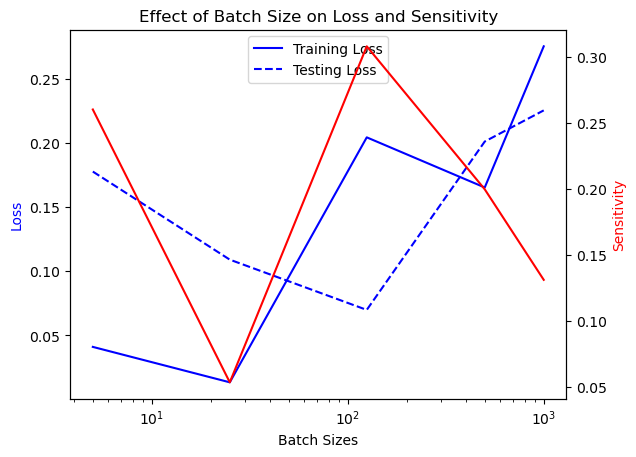

In [127]:
# Visualize Loss and Sensitivity by batch size for all models
fig, loss_axis = plt.subplots()

# Create a second y-axis for sensitivity
sensitivity_axis = loss_axis.twinx()

# Plot training and testing loss
loss_axis.plot(batch_sizes, train_loss_list, 'b', label='Training Loss')
loss_axis.plot(batch_sizes, test_loss_list, 'b--', label='Testing Loss')

# Plot sensitivity
sensitivity_axis.plot(batch_sizes, sensitivity_list, 'r', label='Sensitivity')

# Set title and labels
loss_axis.set_title('Effect of Batch Size on Loss and Sensitivity')
loss_axis.set_xlabel('Batch Sizes')
loss_axis.set_xscale('log')  # Logarithmic scale for batch sizes
loss_axis.set_ylabel('Loss', color='b')
sensitivity_axis.set_ylabel('Sensitivity', color='r')

# Add legends for the plots
loss_axis.legend(loc='upper center')

# Show the plot
plt.show()


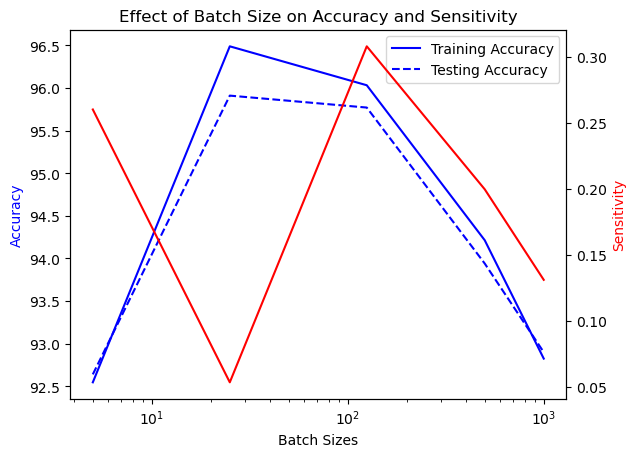

In [128]:
# Visualize Accuracy and Sensitivity by batch size for all models
fig, accuracy_axis = plt.subplots()

# Create a second y-axis for sensitivity
sensitivity_axis = accuracy_axis.twinx()

# Plot training and testing accuracy
accuracy_axis.plot(batch_sizes, train_accuracy_list, 'b', label='Training Accuracy')
accuracy_axis.plot(batch_sizes, test_accuracy_list, 'b--', label='Testing Accuracy')

# Plot sensitivity
sensitivity_axis.plot(batch_sizes, sensitivity_list, 'r', label='Sensitivity')

# Set title and labels
accuracy_axis.set_title('Effect of Batch Size on Accuracy and Sensitivity')
accuracy_axis.set_xlabel('Batch Sizes')
accuracy_axis.set_xscale('log')  # Logarithmic scale for batch sizes
accuracy_axis.set_ylabel('Accuracy', color='b')
sensitivity_axis.set_ylabel('Sensitivity', color='r')

# Add legends for the plots
accuracy_axis.legend(loc='upper right')

# Show the plot
plt.show()
